# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# Содержание проекта  <a class="anchor" id="0-bullet">
* [1. Загрузка и подготовка данных](#1-bullet)
* [2. Обучение и проверка модели](#2-bullet)
* [3. Подготовка к расчёту прибыли](#3-bullet)
* [4. Расчёт прибыли и рисков](#4-bullet)
* [Общий вывод](#5-bullet)

# 1. Загрузка и подготовка данных <a class="anchor" id="1-bullet"></a>
👈[назад к оглавлению](#0-bullet)

#### <span style="color:green">План подготовки данных для обучения:<span>
    
1. Проанализируем данные на предмет пропусков и посмотрим на типы данных, хранящиеся в признаках.
2. Выделим целевой признак из каждой выборки.
3. Проанализируем параметры распределения каждого из признаков.
4. При необходимости масштабируем признаки.

In [1]:
import pandas as pd

geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [2]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [3]:
geo_data_0.sample(5)

,id,f0,f1,f2,product
17929,G8OVt,-0.035974,0.074131,2.853431,176.148231
94241,6AY0I,0.819867,-0.451616,2.868453,74.431604
84803,KZyYk,1.351329,-0.343521,2.312246,139.800778
60673,sMBVe,0.212455,0.990618,6.884092,133.362606
32974,SQQ3a,0.440058,-0.354556,5.718384,134.269126


In [4]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
geo_data_1.sample(5)

,id,f0,f1,f2,product
79817,x7sI9,16.011234,1.497149,-0.003848,0.000000
15116,rxRei,-12.280337,-5.110701,2.996355,84.038886
33083,MjqXn,1.459217,-2.078826,3.001114,84.038886
49796,4rJaK,-3.472108,-2.703917,1.999056,53.906522
50896,mIHSx,-4.124305,-2.639357,0.997444,30.132364


In [6]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
geo_data_2.sample(5)

,id,f0,f1,f2,product
59515,t472A,-0.638450,-2.057873,5.181952,62.881878
74830,lFbbm,-2.594120,0.736560,4.153395,89.662346
97206,W2Gqu,0.884842,0.714307,4.018197,62.879235
23271,8WcBu,-1.255122,6.357982,7.520379,139.512299
40983,ab0ht,1.965822,0.104189,0.644605,115.327301


#### <span style="color:green">Выводы по результатам анализа данных<span>

1. Признак 'id' для обучения модели не нужен.
2. Пропусков нет.
3. Все значимые признаки и целевой признак имеют тип 'float64'.
    
<span style="color:blue">Теперь выделим целевые признаки из датасетов и посмотрим на параметры распределения признаков<span>

In [8]:
# Разделим датасеты на целевые и прочие признаки
target_geo_data_0 = geo_data_0['product']
features_geo_data_0 = geo_data_0.drop(['product','id'] , axis=1)

target_geo_data_1 = geo_data_1['product']
features_geo_data_1 = geo_data_1.drop(['product','id'] , axis=1)

target_geo_data_2 = geo_data_2['product']
features_geo_data_2 = geo_data_2.drop(['product','id'] , axis=1)

In [9]:
# Функция, выводящая аналитику по выборке 
def df_description(df_in, description_name):
    print(description_name)
    print('')
    print(df_in.describe())
    print('')

In [10]:
df_description(features_geo_data_0, 'features_geo_data_0')

features_geo_data_0

                  f0             f1             f2
count  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647
std         0.871832       0.504433       3.248248
min        -1.408605      -0.848218     -12.088328
25%        -0.072580      -0.200881       0.287748
50%         0.502360       0.250252       2.515969
75%         1.073581       0.700646       4.715088
max         2.362331       1.343769      16.003790



In [11]:
df_description(features_geo_data_1, 'features_geo_data_1')

features_geo_data_1

                  f0             f1             f2
count  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541
std         8.965932       5.119872       1.703572
min       -31.609576     -26.358598      -0.018144
25%        -6.298551      -8.267985       1.000021
50%         1.153055      -4.813172       2.011479
75%         8.621015      -1.332816       3.999904
max        29.421755      18.734063       5.019721



In [12]:
df_description(features_geo_data_2, 'features_geo_data_2')

features_geo_data_2

                  f0             f1             f2
count  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128
std         1.732045       1.730417       3.473445
min        -8.760004      -7.084020     -11.970335
25%        -1.162288      -1.174820       0.130359
50%         0.009424      -0.009482       2.484236
75%         1.158535       1.163678       4.858794
max         7.238262       7.844801      16.739402



#### <span style="color:green">Выводы по результатам анализа распределения данных<span>

Поскольку все признаки значимы и имеют разный порядок и параметры распределения, необходимо нормализовать признаки.

<span style="color:blue">Проведем нормализацию<span>

In [13]:
from sklearn.preprocessing import StandardScaler

numeric = ['f0', 'f1', 'f2']
scaler = StandardScaler()

In [14]:
features_geo_data_0[numeric] = scaler.fit_transform(features_geo_data_0[numeric])
features_geo_data_0.sample(5)

,f0,f1,f2
11858,-0.439756,1.533883,-0.506515
87604,0.425801,0.442510,0.009293
49413,-1.562493,0.758744,0.694554
56483,1.930702,0.546111,0.762294
27351,1.380616,-0.950491,0.712465


In [15]:
df_description(features_geo_data_0, 'features_geo_data_0')

features_geo_data_0

                 f0            f1            f2
count  1.000000e+05  1.000000e+05  1.000000e+05
mean   2.287948e-17 -5.044853e-17  9.608314e-17
std    1.000005e+00  1.000005e+00  1.000005e+00
min   -2.189681e+00 -2.177430e+00 -4.491975e+00
25%   -6.572397e-01 -8.941262e-01 -6.818784e-01
50%    2.226500e-03  2.166008e-04  4.101360e-03
75%    6.574259e-01  8.930937e-01  6.811217e-01
max    2.135642e+00  2.168043e+00  4.156460e+00



In [16]:
features_geo_data_1[numeric] = scaler.fit_transform(features_geo_data_1[numeric])
features_geo_data_1.sample(5)

,f0,f1,f2
46904,1.076905,0.853025,-0.875310
92466,0.615459,-1.520174,1.468829
9933,-1.078063,-1.004339,0.297015
74164,-1.418397,1.711796,-1.472491
53863,1.106313,0.777188,-1.466441


In [17]:
df_description(features_geo_data_1, 'features_geo_data_1')

features_geo_data_1

                 f0            f1            f2
count  1.000000e+05  1.000000e+05  1.000000e+05
mean  -7.105427e-18  1.854517e-17  1.444533e-16
std    1.000005e+00  1.000005e+00  1.000005e+00
min   -3.652831e+00 -4.211458e+00 -1.474959e+00
25%   -8.297949e-01 -6.780293e-01 -8.772907e-01
50%    1.311571e-03 -3.240857e-03 -2.835602e-01
75%    8.342420e-01  6.765366e-01  8.836555e-01
max    3.154229e+00  4.595967e+00  1.482293e+00



In [18]:
features_geo_data_2[numeric] = scaler.fit_transform(features_geo_data_2[numeric])
features_geo_data_2.sample(5)

,f0,f1,f2
11334,1.364918,0.401393,0.298035
58188,-0.173350,-0.678120,0.789510
24095,-2.408104,0.510893,-2.504307
26089,1.939007,3.222627,-1.481457
83785,0.959720,-1.262625,1.927425


In [19]:
df_description(features_geo_data_2, 'features_geo_data_2')

features_geo_data_2

                 f0            f1            f2
count  1.000000e+05  1.000000e+05  1.000000e+05
mean   2.241762e-17 -1.435296e-17 -1.391953e-16
std    1.000005e+00  1.000005e+00  1.000005e+00
min   -5.058801e+00 -4.092640e+00 -4.164608e+00
25%   -6.722210e-01 -6.777239e-01 -6.808172e-01
50%    4.272944e-03 -4.277388e-03 -3.135732e-03
75%    6.677185e-01  6.736897e-01  6.804996e-01
max    4.177880e+00  4.534699e+00  4.100928e+00



### <span style="color:green">Результат подготовки данных<span>

Данные каждого датасета нормализованы и из них выделен целевой признак
    
<span style="color:blue">Приступим к обучению и проверке модели<span>

# 2. Обучение и проверка модели <a class="anchor" id="2-bullet"></a>
👈[назад к оглавлению](#0-bullet)

#### <span style="color:green">План обучения и проверки модели<span>

**Для каждого региона обучим свою модель. Проведем следующие действия:**

1. Разобъем данные на обучающую и валидационную выборки в соотношении 75:25.
2. Обучим модели и сделаем предсказания на валидационной выборке.
3. Предсказания и правильные ответы на валидационной выборке сохраним в отдельные датафреймы.
4. Выведем средний запас предсказанного сырья и RMSE модели.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
ftrs_0_train, ftrs_0_valid, trgt_0_train, trgt_0_valid = train_test_split(features_geo_data_0, 
                                                                          target_geo_data_0, 
                                                                          test_size=0.25, 
                                                                          random_state=12345)

In [22]:
ftrs_1_train, ftrs_1_valid, trgt_1_train, trgt_1_valid = train_test_split(features_geo_data_1, 
                                                                          target_geo_data_1, 
                                                                          test_size=0.25, 
                                                                          random_state=12345)

In [23]:
ftrs_2_train, ftrs_2_valid, trgt_2_train, trgt_2_valid = train_test_split(features_geo_data_2, 
                                                                          target_geo_data_2, 
                                                                          test_size=0.25, 
                                                                          random_state=12345)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [25]:
compare = {'model' : [],
                'mean' : [],
                'rmse' : []
               }

compare_data = pd.DataFrame(compare)

In [26]:
def model_learning(compare_data,
                   ftrs_train,
                   trgt_train,
                   ftrs_valid,
                   trgt_valid,
                   data_name):
    
    model = LinearRegression()
    model.fit(ftrs_train, trgt_train)
    
    predictions = model.predict(ftrs_valid)
    mse_model = mean_squared_error(trgt_valid,predictions)
    compare_data = compare_data.append(pd.DataFrame([[data_name, 
                                                  predictions.mean(),
                                                  mse_model**0.5]], 
                                                  columns = ['model', 'mean','rmse']),
                                                  ignore_index=True)

    model_data_array = []
    model_data = pd.DataFrame(model_data_array)
    model_data['targets'] = trgt_valid
    model_data.reset_index(inplace = True)
    model_data['predictions'] = pd.Series(predictions)
    
    return compare_data, model_data.drop(columns=['index'])


In [27]:
compare_data, model_data_0 = model_learning(compare_data,
                                          ftrs_0_train,
                                          trgt_0_train,
                                          ftrs_0_valid,
                                          trgt_0_valid,
                                          'geo_data_0')

In [28]:
compare_data, model_data_1 = model_learning(compare_data,
                                          ftrs_1_train,
                                          trgt_1_train,
                                          ftrs_1_valid,
                                          trgt_1_valid,
                                          'geo_data_1')

In [29]:
compare_data, model_data_2 = model_learning(compare_data,
                                          ftrs_2_train,
                                          trgt_2_train,
                                          ftrs_2_valid,
                                          trgt_2_valid,
                                          'geo_data_2')

In [30]:
compare_data

,model,mean,rmse
0,geo_data_0,92.592568,37.579422
1,geo_data_1,68.728547,0.893099
2,geo_data_2,94.965046,40.029709


#### <span style="color:green">Выводы по результатам обучения моделей<span>

Поскольку все признаки значимы и имеют разный порядок и параметры распределения, необходимо нормализовать признаки.

<span style="color:blue">Проведем нормализацию<span>

In [31]:
model_data_0.sample(5)

,targets,predictions
10735,129.414513,105.784030
24417,57.565054,77.488508
13775,85.122863,59.749823
22752,86.176821,133.472848
16680,88.399963,105.002432


In [32]:
model_data_1.sample(5)

,targets,predictions
1348,3.179103,1.726842
20965,80.859783,80.564506
19757,0.000000,0.641906
7118,3.179103,2.962147
17468,137.945408,137.939162


In [33]:
model_data_2.sample(5)

,targets,predictions
12798,137.282767,112.505832
1337,160.022111,105.087343
17413,147.984971,121.700482
1557,116.325452,94.005396
20337,160.999341,125.343546


### <span style="color:green">Результат обучения моделей и анализа данных по регионам<span>

По результатам проверки моделей на валидационных выборках, для первого и третьего регионов мы получили очень большую ошибку предсказания, тогда как для второго региона - маленькую. Необходим анализ параметров прибыли по регионам
    
<span style="color:blue">Приступим к подготовке данных для расчета прибыли<span>

# 3. Подготовка к расчёту прибыли <a class="anchor" id="3-bullet"></a>
👈[назад к оглавлению](#0-bullet)

#### <span style="color:green">План подготовки<span>

1. Определим и установим ключевые значения для расчета. 
2. Разработаем функцию для расчета прибыли в регионе.

In [34]:
plots_for_region = 500 # Расчетное количество скважин для геологоразведки в регионе
best_plots_number = 200 # Расчетное количество лучших скважин для добычи в регионе
region_budget = 10000000000 # Бюджет разработки региона
income_per_unit = 450000 # Доход от продажи 1000 баррелей
likelyhood_percentage = 2.5 # процент вероятности убытков

cost_of_plot_gelology = region_budget / best_plots_number # Стоимость разработки одной скважины
sufficient_volume = cost_of_plot_gelology / income_per_unit # Емкость скважины для безубыточной разработки

sufficient_volumes = pd.Series([sufficient_volume]*compare_data.index.stop)
compare_data['sufficient_volume'] = sufficient_volumes
compare_data['difference_volume'] = compare_data['mean'] - compare_data['sufficient_volume']

compare_data

,model,mean,rmse,sufficient_volume,difference_volume
0,geo_data_0,92.592568,37.579422,111.111111,-18.518543
1,geo_data_1,68.728547,0.893099,111.111111,-42.382564
2,geo_data_2,94.965046,40.029709,111.111111,-16.146065


In [35]:
print('Расчетная стоимость разработки одной скважины:', cost_of_plot_gelology)

Расчетная стоимость разработки одной скважины: 50000000.0


In [36]:
def profit(model_data):
    targets = model_data['targets'] 
    predictions = model_data['predictions'] 
    sorted_predictions_index = predictions.sort_values(ascending = False).index
    sorted_targets = targets[sorted_predictions_index][:best_plots_number]
    
    return (sorted_targets.sum()*income_per_unit - region_budget) / 1000000


In [37]:
profits_array = []

profits_array.append(profit(model_data_0))
profits_array.append(profit(model_data_1))
profits_array.append(profit(model_data_2))

profits = pd.Series(profits_array)

compare_data['profits'] = profits

compare_data

,model,mean,rmse,sufficient_volume,difference_volume,profits
0,geo_data_0,92.592568,37.579422,111.111111,-18.518543,3320.826043
1,geo_data_1,68.728547,0.893099,111.111111,-42.382564,2415.086697
2,geo_data_2,94.965046,40.029709,111.111111,-16.146065,2710.349964


### <span style="color:green">Результат подготовки к расчету прибыли<span>

Исходя из расчетных данных по затратам на геологоразведку в регионе и стоимости сырья, достаточный объем сырья для безубыточной добычи для каждого из 200 месторождений, составляет в среднем 111 тысяч баррелей. 

Средний объем сырья во всех регионах по прогнозам меньше минимального объема для безубыточной добычи. Однако, если отборать 200 лучших по предсказанному объему сырья скважин, прибыль по региону положительная (от 2,4 до 3,3 млрд. руб.).
    
<span style="color:blue">Далее посмотрим на распределение прибыли и насколько велик риск получить убытки в каждом из регионов<span>

# 4. Расчёт прибыли и рисков <a class="anchor" id="4-bullet"></a>
👈[назад к оглавлению](#0-bullet)

#### <span style="color:green">План расчета прибыли и рисков<span>

1. Сформируем выборки для определения средней прибыли по каждому региону методом *bootstrap*.
2. По этим выборкам определим:
    - среднее значение прибыли для каждого региона;
    - 95% доверительный интервал, показывающий вероятность того, что мы с этой вероятностью получим прибыль в каждом из регионов.
3. Выберем наиболее качественный с точки зрения получения прибыли регион.
    

In [38]:
compare_profit = {'region' : [],
                'indicator' : [],
                'value' : []
               }

compare_profit_data = pd.DataFrame(compare_profit)

In [47]:
import numpy as np

state = np.random.RandomState(12345)

def profit_sample(model_data,
                  compare_profit_data,
                  region_name):
    
    values = []

    for i in range(1000):
        predictions_subsample = model_data['predictions'].sample(n=plots_for_region, 
                                                                 replace=True, 
                                                                 random_state=state)
        model_data_subsample = model_data.loc[predictions_subsample.index]
        
        current_profit = profit(model_data_subsample)
        values.append(current_profit)

    values = pd.Series(values)
    lower = values.quantile(0.025)
    higher = values.quantile(0.975)
    mean = values.mean()
    risk = (values < 0).mean()* 100, "%"
    
    compare_profit_data = compare_profit_data.append(pd.DataFrame([[region_name, 'Средняя прибыль', mean]], 
                                                     columns = ['region', 'indicator','value']),
                                                      ignore_index=True)
    compare_profit_data = compare_profit_data.append(pd.DataFrame([[region_name, 'Минимальная прибыль', lower]], 
                                                     columns = ['region', 'indicator','value']),
                                                      ignore_index=True)
    compare_profit_data = compare_profit_data.append(pd.DataFrame([[region_name, 'Максимальная прибыль', higher]], 
                                                     columns = ['region', 'indicator','value']),
                                                      ignore_index=True)
    
    compare_profit_data = compare_profit_data.append(pd.DataFrame([[region_name, 'Риск', risk]], 
                                                     columns = ['region', 'indicator','value']),
                                                      ignore_index=True)
    
    return values, compare_profit_data

In [40]:
# Импортируем графическую библиотеку
import matplotlib.pyplot as plt
import scipy.stats as scs

# Функция для формирования двух диаграм рядом
def df_three_histograms(series1, 
                        series2, 
                        series3, 
                        series_name1, 
                        series_name2, 
                        series_name3, 
                        description_name, 
                        bins_number):

    plt.figure(0)

    n1, bins1, patches1 = plt.hist(series1, 
                                   bins_number, 
                                   density=True, 
                                   facecolor='g', 
                                   label = series_name1, 
                                   alpha=0.3)
    
    n2, bins2, patches2 = plt.hist(series2, 
                                   bins_number, 
                                   density=True, 
                                   facecolor='b', 
                                   label = series_name2, 
                                   alpha=0.3)
    
    n3, bins3, patches3 = plt.hist(series3, 
                                   bins_number, 
                                   density=True, 
                                   facecolor='r', 
                                   label = series_name3, 
                                   alpha=0.3)

    series1_description = series1.describe()
    series2_description = series2.describe()
    series3_description = series3.describe()
        
    y1 = scs.norm.pdf(bins1, series1_description[1], series1_description[2])
    y2 = scs.norm.pdf(bins2, series2_description[1], series2_description[2])
    y3 = scs.norm.pdf(bins3, series3_description[1], series3_description[2])
    
    plt.plot(bins1, y1, 'g--')
    plt.plot(bins2, y2, 'b--')
    plt.plot(bins3, y3, 'r--')

    plt.xlabel('Прибыль в регионе')
    plt.ylabel('Частота в выборке')

    plt.gca().set(title=description_name)

    plt.legend()
    plt.grid()
    plt.plot()
    
    return series1_description, series2_description, series3_description

In [41]:
profit_sample_0, compare_profit_data = profit_sample(model_data_0, compare_profit_data, '№ 1')
profit_sample_1, compare_profit_data = profit_sample(model_data_1, compare_profit_data, '№ 2')
profit_sample_2, compare_profit_data = profit_sample(model_data_2, compare_profit_data, '№ 3')

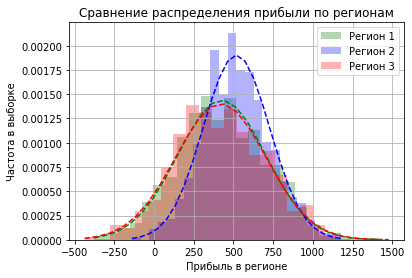

In [42]:
reg_0_descr, reg_1_descr, reg_2_descr = df_three_histograms(
                                        profit_sample_0, 
                                        profit_sample_1, 
                                        profit_sample_2, 
                                        'Регион 1', 
                                        'Регион 2', 
                                        'Регион 3', 
                                        'Сравнение распределения прибыли по регионам', 
                                        'auto')

In [43]:
import seaborn as sns

# Построим сравнительную диаграмму
g = sns.catplot(x="region", 
                y="value", 
                hue="indicator", 
                kind="bar",
                data=compare_profit_data)

g.set_axis_labels("Регион", "Средняя и минимальная прибыль, млн.руб.")
g.ax.set_title("Сравнительная гистограмма средней и минимальной прибыли для трех регионов")

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [48]:
compare_profit_data

,region,indicator,value
0,№ 1,Средняя прибыль,425.939
1,№ 1,Минимальная прибыль,-102.09
2,№ 1,Максимальная прибыль,947.976
3,№ 1,"Риск, %","(6.0, %)"
4,№ 2,Средняя прибыль,518.259
5,№ 2,Минимальная прибыль,128.123
6,№ 2,Максимальная прибыль,953.613
7,№ 2,"Риск, %","(0.3, %)"
8,№ 3,Средняя прибыль,420.194
9,№ 3,Минимальная прибыль,-115.853


### <span style="color:green">Выводы по результатам анализа распределения прибыли<span>

Для первого и третьего регионов характерен большой разброс данных. Средняя прибыль в них примерно одинаковая 425 и 420 млн. руб., соответственно.
    
Во втором регионе средняя прибыль выше (518 млн. руб.) и разброс данных существенно ниже.
    
<span style="color:red">По параметру средней прибыли однозначно лучший второй регион.<span>

# Общий вывод <a class="anchor" id="5-bullet"></a>
👈[назад к оглавлению](#0-bullet)

## <span style="color:green">Рекомендации по выбору региона для добычи<span>

### <span style="color:red">Для дальнейшей разработки и добычи нефти рекомендуется выбрать второй регион.<span>
    
### Причины для такого решения следущие:
    
1. **Средняя прибыль**, рассчитанная по выборке - **518 млн. руб.** В остальных регионах - примерно на 100 млн. руб. меньше.
2. Все значения прибыли, попадающие в 95% доверительный интервал - положительные. Следовательно **риск получить убытки при разработке региона составляет менее 5%**. В остальных регионах при расчете доверительного интервала мы получили вероятность убытка (около 100 млн. руб.)


##### <span style="color:green">Средняя стоимость разработки одной скважины составляет 50 млн. руб. Вычислим процент скважин, приносящих убытки по каждому региону. Для этого возьмем полную выборку для каждого региона и посчитаем для нее процент скважин, приносящих убыток.<span>

In [45]:
def percentage_of_non_profit_units(geo_data):
    
    geo_data['profit'] = geo_data['product']*income_per_unit - cost_of_plot_gelology

    count_of_non_profit = geo_data[geo_data['profit'] <= 0]['profit'].count()
    all_count = geo_data['profit'].count()

    percentage_of_non_profit = count_of_non_profit/all_count*100
    return percentage_of_non_profit

In [46]:
percentages_of_non_profit_units = []
percentages_of_non_profit_units.append(percentage_of_non_profit_units(geo_data_0))
percentages_of_non_profit_units.append(percentage_of_non_profit_units(geo_data_1))
percentages_of_non_profit_units.append(percentage_of_non_profit_units(geo_data_2))

compare_data['percentage_of_non_profit_units'] = percentages_of_non_profit_units

compare_data

,model,mean,rmse,sufficient_volume,difference_volume,profits,percentage_of_non_profit_units
0,geo_data_0,92.592568,37.579422,111.111111,-18.518543,3320.826043,63.417
1,geo_data_1,68.728547,0.893099,111.111111,-42.382564,2415.086697,83.463
2,geo_data_2,94.965046,40.029709,111.111111,-16.146065,2710.349964,61.822


##### <span style="color:green">Хотя доля скважин с убытком во втором регионе на 25% выше, чем в остальных, этот регион все равно лучше для разработки. Т.к. риск получения убытков при добыче в нем меньше 5%.<span>

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован